In [1]:
import numpy as np

import matplotlib.pyplot as plt

#%tensorflow_version 2.x

import tensorflow as tf

from tensorflow.keras.models import Model

from tensorflow.keras.layers import Dense , Conv2D, Flatten, MaxPooling2D, BatchNormalization

from tensorflow.keras import utils

from tensorflow.keras.datasets import mnist

In [2]:
(x_train, y_train), (x_test, y_test)=mnist.load_data()

In [3]:
from sklearn.model_selection import train_test_split
x=np.concatenate((x_train, x_test))
y=np.concatenate((y_train, y_test))
print("dataset shape",x.shape)
print("labels shape",y.shape)
train_size=0.6
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=train_size)
print("training data",x_train.shape)
print("training labels",y_train.shape)
print("testing data",x_test.shape)
print("testing labels",y_test.shape)

dataset shape (70000, 28, 28)
labels shape (70000,)
training data (42000, 28, 28)
training labels (42000,)
testing data (28000, 28, 28)
testing labels (28000,)


/home/gitanjali/anaconda3/envs/intel_python/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


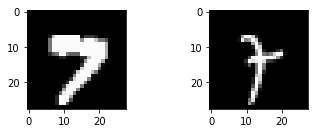

In [4]:
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(x_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(x_train[1], cmap=plt.get_cmap('gray'))

In [5]:
x_train=np.expand_dims(x_train, axis=3)
x_test=np.expand_dims(x_test, axis=3)

input_shape=(x_train.shape[1], x_train.shape[2], x_train.shape[3])
print("input_shape",input_shape)

# precise the pixel value to be 32 bit
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")

# normalize input from 0-255 to 0-1
x_train = x_train / 255.
x_test = x_test / 255.

print("normalize training data", x_train.shape)
print("normalize testing data", x_test.shape)
print("training labels", y_train.shape)
print("testing labels", y_test.shape)

input_shape (28, 28, 1)
normalize training data (42000, 28, 28, 1)
normalize testing data (28000, 28, 28, 1)
training labels (42000,)
testing labels (28000,)


In [6]:
model = tf.keras.models.Sequential([
    tf.keras.Input(shape=input_shape),
                   tf.keras.layers.Conv2D(64, 3, strides=(1,1), activation='relu'),
                   tf.keras.layers.BatchNormalization(),
                   tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=2),
                   tf.keras.layers.Conv2D(128, 3, strides=(1,1), activation='relu'),
                   tf.keras.layers.BatchNormalization(),
                   tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=2),
                   tf.keras.layers.Conv2D(256, 3, strides=(1,1), activation='relu'),
                   tf.keras.layers.BatchNormalization(),
                   tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=2),
                   tf.keras.layers.Flatten(),
                   tf.keras.layers.Dropout(0.25),
                   tf.keras.layers.Dense(1024, activation='relu'),
                   tf.keras.layers.Dropout(0.25),
                   tf.keras.layers.Dense(10, activation='softmax')
                   ])


In [7]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
loss_fn

from tensorflow.keras.optimizers import SGD, Adam

sgd = SGD(lr = 0.001, momentum = 0.9, decay = 1e-6)

In [8]:
model.compile(optimizer=sgd,
              loss=loss_fn,
              metrics=['accuracy'])

In [9]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50, batch_size=200)


Train on 42000 samples, validate on 28000 samples
Epoch 1/50
42000/42000 [==============================] - 163s 4ms/sample - loss: 1.9480 - accuracy: 0.5635 - val_loss: 2.2781 - val_accuracy: 0.1113
Epoch 2/50
42000/42000 [==============================] - 161s 4ms/sample - loss: 1.6314 - accuracy: 0.8791 - val_loss: 1.9386 - val_accuracy: 0.6420
Epoch 3/50
42000/42000 [==============================] - 162s 4ms/sample - loss: 1.5595 - accuracy: 0.9289 - val_loss: 1.5496 - val_accuracy: 0.9408
Epoch 4/50
42000/42000 [==============================] - 161s 4ms/sample - loss: 1.5370 - accuracy: 0.9436 - val_loss: 1.5189 - val_accuracy: 0.9561
Epoch 5/50
42000/42000 [==============================] - 161s 4ms/sample - loss: 1.5258 - accuracy: 0.9502 - val_loss: 1.5109 - val_accuracy: 0.9602
Epoch 6/50
42000/42000 [==============================] - 161s 4ms/sample - loss: 1.5176 - accuracy: 0.9556 - val_loss: 1.5052 - val_accuracy: 0.9644
Epoch 7/50
42000/42000 [==========================

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 128)       73856     
_________________________________________________________________
batch_normalization_1 (Batch (None, 11, 11, 128)       512       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 256)         2

In [16]:
from keras.models import model_from_json
# save trained model
# serialize model to JSON
model_json = model.to_json()
with open("Q3_part2_mnist_trained_model_sgd_50_epochs_variation3.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5 and saving the weights
model.save_weights("Q3_part2_mnist_trained_model_sgd_50_epochs_variation3.h5")
print("Saved model to disk")

Saved model to disk


Using TensorFlow backend.


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


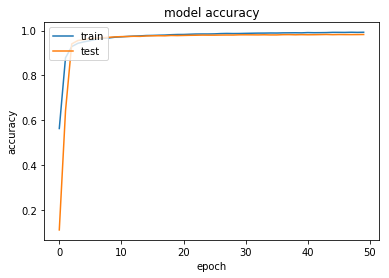

In [11]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

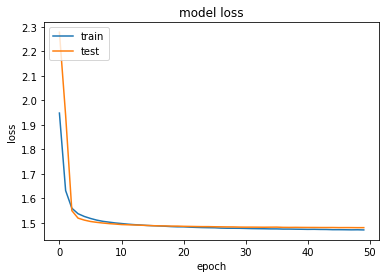

In [12]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [13]:
# Final evaluation of the model

scores = model.evaluate(x_test, y_test)

print("Accuracy : %.2f%%" % (scores[1]*100))
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

28000/28000 [==============================] - 28s 989us/sample - loss: 1.4801 - accuracy: 0.9828
Accuracy : 98.28%
Baseline Error: 1.72%


# Model testing and find out confusion matrix, Precision, Recall, F1-score

In [13]:
import tensorflow as tf
y= model.predict(x_test)
print(y.shape)
y_pred = np.argmax(y, axis=1)
print(y_pred.shape)

target=target_names = ['class0','class 1', 'class 2', 'class 3', 'class 4', 'class 5', 'class 6', 'class 7', 'class 8', 'class 9'] 

con = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)
print(con)

(28000, 10)
(28000,)
tf.Tensor(
[[2725    1    0    0    4    2    1    1    2    4]
 [   1 3076   10    1    1    0    0    6    0    0]
 [   1    2 2830    5    2    0    2   16    3    1]
 [   0    0   12 2790    0    9    0    6    2    6]
 [   2    1    0    0 2779    0    3    1    1    9]
 [   2    0    1    3    5 2544    3    2    5    0]
 [   4    4    0    0    3    7 2679    0    2    0]
 [   0    4   11    2    1    0    0 2863    0    1]
 [   1    3    3    1    2    4    2    1 2744   11]
 [   6    1    0    1    8    2    0    6    4 2736]], shape=(10, 10), dtype=int32)


In [14]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2740
           1       0.99      0.99      0.99      3095
           2       0.99      0.99      0.99      2862
           3       1.00      0.99      0.99      2825
           4       0.99      0.99      0.99      2796
           5       0.99      0.99      0.99      2565
           6       1.00      0.99      0.99      2699
           7       0.99      0.99      0.99      2882
           8       0.99      0.99      0.99      2772
           9       0.99      0.99      0.99      2764

   micro avg       0.99      0.99      0.99     28000
   macro avg       0.99      0.99      0.99     28000
weighted avg       0.99      0.99      0.99     28000



# Visualization of activation map and convnet filters

In [9]:
model.load_weights("Q3_part2_mnist_trained_model_sgd_50_epochs_variation3.h5")
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 128)       73856     
_________________________________________________________________
batch_normalization_1 (Batch (None, 11, 11, 128)       512       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 256)         2

In [10]:
model = Model(inputs=model.inputs, outputs=model.layers[7].output)
print(model.inputs)

[<tf.Tensor 'input_1:0' shape=(None, 28, 28, 1) dtype=float32>]


(1, 28, 28, 1)


(-0.5, 27.5, 27.5, -0.5)

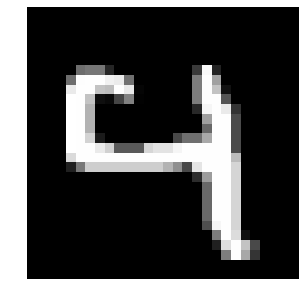

In [11]:
img = x_test[110].reshape(1,28,28,1)
print(img.shape)
figure = plt.figure(figsize=(5,5))
plt.imshow (img[0,:,:,0],cmap="gray")
plt.axis('off')

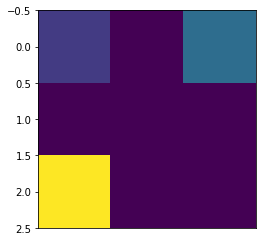

In [15]:
feature_maps = model.predict(img)

# plot all 64 maps in an 8x8 squares
square1 = 1
square2 = 1
ix = 1
for _ in range(square1):
	for _ in range(square2):
		# specify subplot and turn of axis
		ax = plt.subplot(square1, square2, ix)
		ax.set_xticks([])
		#ax.set_yticks([])
		# plot filter channel in grayscale
		plt.imshow(feature_maps[0, :, :, ix-9], cmap='viridis')
		ix += 1
# show the figure
plt.savefig('featuremap_disp.png')

(3, 3, 128, 256)


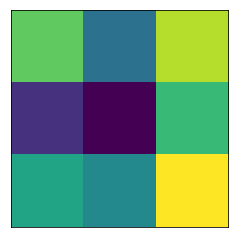

In [24]:
for layer in model.layers:
    if 'conv' not in layer.name:
        continue
    #filters, biases = layer.get_weights()
    #print(layer.name, filters.shape)
    
filters, biases = model.layers[7].get_weights()
filters1 = filters
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min)/(f_max - f_min)
#print(filters.shape, biases.shape)
print(filters1.shape)
#plt.imshow(filters[1, :, :, 0], cmap='viridis')
#plt.show()
# plot all 64 maps in an 8x8 squares
n_filters = 1
ix = 1

for i in range(n_filters):
    f = filters[:, :, :, 50]
    #plot each channel seperately
    for j in range(1):
		# specify subplot and turn of axis
        ax = plt.subplot(n_filters, 1, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        plt.imshow(f[:, :, j], cmap='viridis') 
        ix += 1
# show the figure
plt.savefig('featuremap_disp_filter.png')
plt.show()